<a href="https://colab.research.google.com/github/adityajain2407/biz-cases/blob/main/aj_scaler_ref_ScalerClustered_For_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: Scaler [Clustering]

In [3]:
import re
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('scaler_hashed_for_students.csv')
df.head(2)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000.0,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999.0,FullStack Engineer,2019.0


In [5]:
pd.DataFrame(df.job_position.value_counts())[50:60]

,job_position
Associate Analyst,1
Business analysts,1
Networking,1
Integration Developer,1
Senior Developer,1
Senior SDET,1
Software Engineer,1
SDET-2,1
Business consultant,1
Lead Analyst,1


In [6]:
df.job_position.value_counts()[:10]

Backend Engineer          3156
Other                     2493
FullStack Engineer        2404
Frontend Engineer          859
Support Engineer           650
QA Engineer                618
Data Analyst               467
Data Scientist             288
Engineering Leadership     266
Android Engineer           255
Name: job_position, dtype: int64

# Data Preprocessing - Cleaning of all variables

In [7]:
df.drop(columns=['email_hash','Unnamed: 0'],inplace=True)

In [8]:
#just keeping all the alphabets in lower case and removing everything else - numbers and all to empty-->
#strip to avoid dangling spaces - sde-1,2,3 all are sde now
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string

mystring='\tAirtel\\\\&&**() X Labs'
preprocess_string(mystring)

'airtel x labs'

In [9]:
df.job_position.nunique()

103

In [10]:
df.job_position=df.job_position.apply(lambda x: preprocess_string(str(x)))
df.job_position.nunique()

100

In [11]:
df.shape

(17695, 5)

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(17013, 5)

should I drop them?

In [13]:
df['company_hash'].value_counts().sort_index()

0                 2
1                 1
1000uqgltwn       1
10nxbto           1
159 ogrhnxgzo     2
                 ..
zxzlvwvqn         6
zxztrtvuo         9
zxzvzxjv sqghu    1
zz                2
zzzbzb            1
Name: company_hash, Length: 6109, dtype: int64

In [14]:
df.company_hash.nunique()

6109

In [15]:
df.company_hash=df.company_hash.apply(lambda x: preprocess_string(str(x)))
df.company_hash.nunique()

6099

In [16]:
df['company_hash'].value_counts().sort_index()

                                            12
a b onttr wgqu                               1
a ntwyzgrgsxto                               3
aab xzegqbvnxwo                              1
aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna     1
                                            ..
zxzlvwvqn                                    6
zxztrtvuo                                    9
zxzvzxjv sqghu                               1
zz                                           2
zzzbzb                                       1
Name: company_hash, Length: 6099, dtype: int64

In [17]:
#removing rows where company or job_position is not available
df=df[ ~((df['company_hash']=='') | (df['job_position']==''))]

### Filling Null values using Mean Target Inputation for Orgyear

In [18]:
df['orgyear'].isnull().sum()

15

In [19]:
df['orgyear'].fillna(df.groupby('company_hash')['orgyear'].transform('median'), inplace=True)

<ipython-input-19-c74d87856429>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['orgyear'].fillna(df.groupby('company_hash')['orgyear'].transform('median'), inplace=True)


In [20]:
df = df.loc[~df['orgyear'].isna()]

### Checking for outliers in orgyear

In [21]:
df.orgyear.head()

0    2016.0
1    2018.0
2    2015.0
3    2017.0
4    2017.0
Name: orgyear, dtype: float64

In [22]:
df.orgyear.describe()

count    16993.000000
mean      2015.656976
std         28.791015
min          0.000000
25%       2015.000000
50%       2017.000000
75%       2018.000000
max       2106.000000
Name: orgyear, dtype: float64

<Axes: >

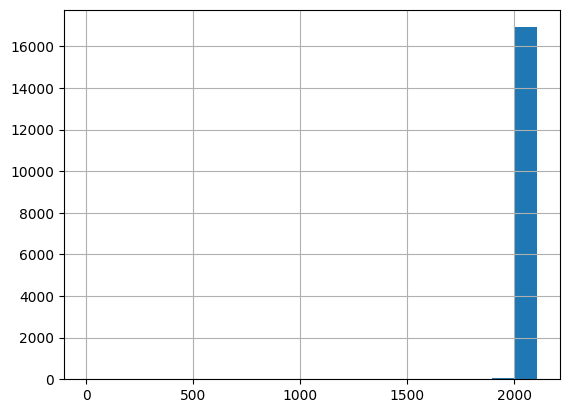

In [23]:
#simple understanding
df.orgyear.hist(bins=20)

In [24]:
df['orgyear'] = df['orgyear'].clip(lower=df.orgyear.quantile(0.01), upper=df.orgyear.quantile(0.99))
df['ctc'] = df['ctc'].clip(lower=df.ctc.quantile(0.01), upper=df.ctc.quantile(0.99))

In [69]:
#We see some 'nan's in job_position --> if during pre-precessing changed everything to string
#nan is no longer nan so change back else incorrect output
df.loc[df['job_position']=='nan', 'job_position']=np.nan

## Masking companies by renaming it to "Others" having count less than 5

In [26]:
#making the code
df.company_hash.value_counts()

nvnv wgzohrnvzwj otqcxwto    726
xzegojo                      483
wgszxkvzn                    401
vwwtznhqt                    343
fxuqg rxbxnta                306
                            ... 
vcvnvqrvmo                     1
ftmatop ogrhnxgzo              1
wgobxw trtwnqxwvr fgqpo        1
vb ftmntwy                     1
zhgegd rvmo ucn rna            1
Name: company_hash, Length: 6090, dtype: int64

In [27]:
#creating a bucket of others - to reduce down unique companies - if less than 4 employees
df.loc[df.groupby('company_hash')['ctc'].transform('count') < 5, 'company_hash'] = 'Others'

#### Creating Years of Experience Columns

In [28]:
df['orgyear'].describe()

count    16993.000000
mean      2016.112929
std          3.260669
min       2003.000000
25%       2015.000000
50%       2017.000000
75%       2018.000000
max       2021.000000
Name: orgyear, dtype: float64

In [29]:
df['years_of_experience']=2022-df['orgyear']
#a new feature to check how many yrs in the current company

In [30]:
df.drop_duplicates(inplace=True)
df.shape

(14604, 6)

In [31]:
df=df[~df['years_of_experience'].isnull()]

In [32]:
# update cant be before joining - you can also change org to ctc with min - basically ctc >= org year
df['ctc_updated_year'] = df[['ctc_updated_year', 'orgyear']].max(axis=1)

In [33]:
#Filling null values with others  -- if not done before
df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')

In [34]:
df.isnull().sum()
#All good now

company_hash           0
orgyear                0
ctc                    0
job_position           0
ctc_updated_year       0
years_of_experience    0
dtype: int64

In [35]:
df.drop_duplicates(inplace=True)
df.shape

(14549, 6)

In [36]:
df.describe()

,orgyear,ctc,ctc_updated_year,years_of_experience
count,14549.000000,1.454900e+04,14549.000000,14549.000000
mean,2015.955667,3.638424e+06,2020.229569,6.044333
std,3.377480,1.562205e+07,0.652992,3.377480
min,2003.000000,4.786800e+04,2016.000000,1.000000
25%,2014.000000,5.000000e+05,2020.000000,4.000000
50%,2017.000000,8.000000e+05,2020.000000,5.000000
75%,2018.000000,1.450000e+06,2021.000000,8.000000
max,2021.000000,1.202400e+08,2021.000000,19.000000


In [37]:
df.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,Others,2016.0,1100000.0,other,2020.0,6.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0


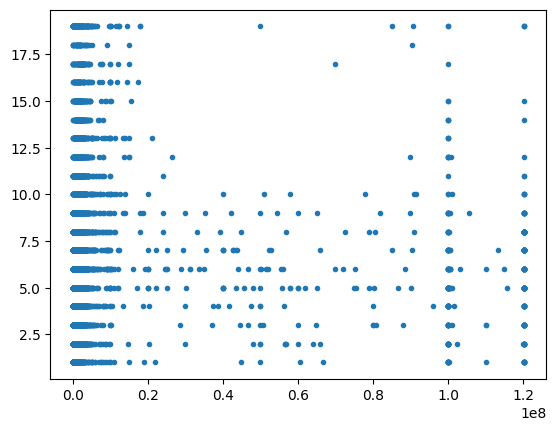

In [38]:
import matplotlib.pyplot as plt
plt.plot(df['ctc'], df['years_of_experience'], '.')

---

## Manual Clustering based on company, job position and years of experience

In [39]:
grouped_c_j_y = df.groupby(['years_of_experience','job_position','company_hash'])['ctc'].describe()
grouped_c_j_y

count  \
years_of_experience job_position         company_hash                        
1.0                 Others               Others                       34.0   
                                         athnowyt ntrtpgb              1.0   
                                         atrr                          1.0   
                                         atrr ntwyzgrgsxto             1.0   
                                         bvi ogenfvqt                  1.0   
...                                                                    ...   
19.0                qa engineer          pqgzgo xzwgqugqvnta           1.0   
                    security leadership  vqxwtzn                       1.0   
                    sr executive         Others                        1.0   
                    support engineer     Others                        2.0   
                    technical consulting ytfrtnn uvwpvqa tzntquqxot    1.0   

                                                                             mean  \
years_of_experience job_position         company_hash                               
1.0                 Others               Others                      6.156471e+06   
                                         athnowyt ntrtpgb            2.800000e+06   
                                         atrr                        3.000000e+05   
                                         atrr ntwyzgrgsxto           8.000000e+05   
                                         bvi ogenfvqt                1.000000e+06   
...                                                                           ...   
19.0                qa engineer          pqgzgo xzwgqugqvnta         6.000000e+05   
                    security leadership  vqxwtzn                     3.000000e+05   
                    sr executive         Others                      1.500000e+06   
                    support engineer     Others                      6.014750e+07   
                    technical consulting ytfrtnn uvwpvqa tzntquqxot  2.500000e+06   

                                                                              std  \
years_of_experience job_position         company_hash                               
1.0                 Others               Others                      2.153402e+07   
                                         athnowyt ntrtpgb                     NaN   
                                         atrr                                 NaN   
                                         atrr ntwyzgrgsxto                    NaN   
                                         bvi ogenfvqt                         NaN   
...                                                                           ...   
19.0                qa engineer          pqgzgo xzwgqugqvnta                  NaN   
                    security leadership  vqxwtzn                              NaN   
                    sr executive         Others                               NaN   
                    support engineer     Others                      8.498363e+07   
                    technical consulting ytfrtnn uvwpvqa tzntquqxot           NaN   

                                                                           min  \
years_of_experience job_position         company_hash                            
1.0                 Others               Others                       120000.0   
                                         athnowyt ntrtpgb            2800000.0   
                                         atrr                         300000.0   
                                         atrr ntwyzgrgsxto            800000.0   
                                         bvi ogenfvqt                1000000.0   
...                                                                        ...   
19.0                qa engineer          pqgzgo xzwgqugqvnta          600000.0   
                    security leadership  vqxwtzn                      300000.0   
                    sr

In [40]:
df_cjy=df.merge(grouped_c_j_y, on=['years_of_experience','job_position','company_hash'], how='left')
df_cjy

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,Others,2016.0,1100000.0,other,2020.0,6.0,118.0,7.493965e+06,2.334845e+07,47868.0,412500.0,635000.0,999999.75,1.202400e+08
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3.0,6.733330e+05,2.542313e+05,449999.0,534999.5,620000.0,785000.00,9.500000e+05
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,93.0,1.192062e+06,1.102910e+06,47868.0,580000.0,970000.0,1500000.00,9.000000e+06
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,1.0,7.000000e+05,NaN,700000.0,700000.0,700000.0,700000.00,7.000000e+05
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,108.0,1.892814e+06,6.220732e+06,47868.0,450000.0,800000.0,1200000.00,6.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14544,Others,2014.0,1140000.0,qa engineer,2020.0,8.0,26.0,5.798462e+06,2.341471e+07,200000.0,592500.0,725000.0,900000.00,1.202400e+08
14545,eqtoyfgqpo,2013.0,11100000.0,other,2020.0,9.0,1.0,1.110000e+07,NaN,11100000.0,11100000.0,11100000.0,11100000.00,1.110000e+07
14546,vwwtznhqt,2017.0,40000000.0,data analyst,2020.0,5.0,4.0,1.035750e+07,1.976174e+07,400000.0,475000.0,515000.0,10397500.00,4.000000e+07
14547,vdxo mvzp,2018.0,1300000.0,data analyst,2021.0,4.0,1.0,1.300000e+06,NaN,1300000.0,1300000.0,1300000.0,1300000.00,1.300000e+06


### Creating Designation basis on the salary they are getting in their respective company

In [41]:
def segment(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2

    elif a>=b_75:
        return 1


In [42]:
df_cjy['designation'] =df_cjy.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_cjy.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,designation
0,Others,2016.0,1100000.0,other,2020.0,6.0,118.0,7.493965e+06,2.334845e+07,47868.0,412500.0,635000.0,999999.75,1.202400e+08,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3.0,6.733330e+05,2.542313e+05,449999.0,534999.5,620000.0,785000.00,9.500000e+05,3


In [43]:
df_cjy.designation.value_counts(normalize=True)

2    0.479827
3    0.319816
1    0.200357
Name: designation, dtype: float64

## Manual Clustering based on company and job position

In [44]:
grouped_c_j=df.groupby(['job_position','company_hash'])['ctc'].describe()
grouped_c_j.head()

count          mean           std        min  \
job_position company_hash                                                     
Others       Others            925.0  3.476578e+06  1.452354e+07    47868.0   
             adw ntwyzgrgsj      8.0  8.993750e+05  6.664106e+05   400000.0   
             adw ntwyzgrgsxto    4.0  6.175000e+05  2.681262e+05   400000.0   
             amo mvzp            4.0  8.050000e+05  1.369915e+05   700000.0   
             aqhcv               1.0  1.600000e+06           NaN  1600000.0   

                                     25%        50%        75%           max  
job_position company_hash                                                     
Others       Others             450000.0   800000.0  1500000.0  1.202400e+08  
             adw ntwyzgrgsj     480000.0   642500.0   967500.0  2.300000e+06  
             adw ntwyzgrgsxto   452500.0   535000.0   700000.0  1.000000e+06  
             amo mvzp           715000.0   760000.0   850000.0  1.000000e+06  
             aqhcv             1600000.0  1600000.0  1600000.0  1.600000e+06

In [45]:
df_cj=df.merge(grouped_c_j, on=['job_position','company_hash'], how='left')
df_cj.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,Others,2016.0,1100000.0,other,2020.0,6.0,773.0,5.986350e+06,2.082720e+07,47868.0,400000.00,670000.0,1200000.0,1.202400e+08
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,6.0,6.533332e+05,2.750759e+05,300000.0,487499.25,610000.0,867500.0,1.000000e+06


### Creating Class basis on the salary they are getting in their respective company

In [46]:
df_cj['classs'] = df_cj.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_cj.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,classs
0,Others,2016.0,1100000.0,other,2020.0,6.0,773.0,5.986350e+06,2.082720e+07,47868.0,400000.00,670000.0,1200000.0,1.202400e+08,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,6.0,6.533332e+05,2.750759e+05,300000.0,487499.25,610000.0,867500.0,1.000000e+06,3


In [47]:
df_cj.classs.value_counts(normalize=True)

3    0.420166
2    0.336793
1    0.243041
Name: classs, dtype: float64

In [48]:
# job position that has the highest class
df_cj[df_cj['classs']==1][['job_position','ctc']].groupby('job_position')['ctc'].describe().sort_values(by=['count','mean'],ascending=False)[:10]

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
Others,880.0,7.968251e+06,2.351543e+07,340000.0,1150000.0,1800000.0,2800000.0,1.202400e+08
backend engineer,690.0,7.737246e+06,2.141908e+07,400000.0,1400000.0,2100000.0,3500000.0,1.202400e+08
other,499.0,1.962654e+07,3.761364e+07,400000.0,1100000.0,1670000.0,5150000.0,1.202400e+08
fullstack engineer,486.0,8.045140e+06,2.327165e+07,320000.0,1200000.0,1800000.0,2900000.0,1.202400e+08
frontend engineer,184.0,9.211549e+06,2.386780e+07,400000.0,1330000.0,1675000.0,2870000.0,1.202400e+08
support engineer,145.0,1.802148e+07,3.865266e+07,400000.0,900000.0,1200000.0,2200000.0,1.202400e+08
qa engineer,130.0,1.366646e+07,3.239256e+07,420000.0,1000000.0,1420000.0,2400000.0,1.202400e+08
data analyst,102.0,2.192688e+07,4.310602e+07,300000.0,1000000.0,1500000.0,4500000.0,1.202400e+08
engineering leadership,59.0,1.828356e+07,3.539835e+07,450000.0,2600000.0,3900000.0,6650000.0,1.202400e+08


In [49]:
df_cj.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [50]:
df_cjy_cj=df_cj.merge(df_cjy, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how='left')
df_cjy_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation
0,Others,2016.0,1100000.0,other,2020.0,6.0,2,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3,3
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,1,1
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,1,2
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,2,1
...,...,...,...,...,...,...,...,...
14544,Others,2014.0,1140000.0,qa engineer,2020.0,8.0,1,1
14545,eqtoyfgqpo,2013.0,11100000.0,other,2020.0,9.0,1,2
14546,vwwtznhqt,2017.0,40000000.0,data analyst,2020.0,5.0,1,1
14547,vdxo mvzp,2018.0,1300000.0,data analyst,2021.0,4.0,2,2


## Manual Clustering based on comapny

In [51]:
grouped_c = df.groupby(['company_hash'])['ctc'].describe()
df_c = df.merge(grouped_c, on=['company_hash'], how='left')
df_c.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,Others,2016.0,1100000.0,other,2020.0,6.0,5267.0,4.213365e+06,1.681606e+07,47868.0,480000.0,800000.0,1500000.0,1.202400e+08
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,45.0,3.958667e+06,1.542201e+07,250000.0,450000.0,750000.0,1380000.0,1.000000e+08


### Creating Tier basis on the salary in the companies

In [52]:
df_c['tier'] =df_c.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_c.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,tier
0,Others,2016.0,1100000.0,other,2020.0,6.0,5267.0,4.213365e+06,1.681606e+07,47868.0,480000.0,800000.0,1500000.0,1.202400e+08,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,45.0,3.958667e+06,1.542201e+07,250000.0,450000.0,750000.0,1380000.0,1.000000e+08,3


In [53]:
df_c.tier.value_counts(normalize=True)

3    0.464980
2    0.296653
1    0.238367
Name: tier, dtype: float64

In [54]:
df_cjy_cj_c=df_cjy_cj.merge(df_c, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how='left')
df_cjy_cj_c.head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,count,mean,std,min,25%,50%,75%,max,tier
0,Others,2016.0,1100000.0,other,2020.0,6.0,2,1,5267.0,4.213365e+06,1.681606e+07,47868.0,480000.0,800000.0,1500000.0,1.202400e+08,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3,3,45.0,3.958667e+06,1.542201e+07,250000.0,450000.0,750000.0,1380000.0,1.000000e+08,3
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,1,1,5267.0,4.213365e+06,1.681606e+07,47868.0,480000.0,800000.0,1500000.0,1.202400e+08,1
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,1,2,7.0,8.771429e+05,3.214921e+05,520000.0,610000.0,900000.0,1075000.0,1.350000e+06,3
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,2,1,5267.0,4.213365e+06,1.681606e+07,47868.0,480000.0,800000.0,1500000.0,1.202400e+08,2
5,Others,2018.0,700000.0,fullstack engineer,2020.0,4.0,3,2,5267.0,4.213365e+06,1.681606e+07,47868.0,480000.0,800000.0,1500000.0,1.202400e+08,3
6,lubgqsvz wyvot wg,2018.0,1500000.0,fullstack engineer,2019.0,4.0,3,2,66.0,3.519793e+06,1.460722e+07,47868.0,1400000.0,1662500.0,2100000.0,1.202400e+08,3
7,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0,3,2,7.0,9.671429e+05,1.148691e+06,300000.0,400000.0,430000.0,870000.0,3.500000e+06,3
8,utqoxontzn ojontbo,2020.0,450000.0,Others,2020.0,2.0,3,2,51.0,1.295686e+06,2.534762e+06,400000.0,595000.0,800000.0,1300000.0,1.867000e+07,3
9,Others,2019.0,360000.0,Others,2019.0,3.0,3,3,5267.0,4.213365e+06,1.681606e+07,47868.0,480000.0,800000.0,1500000.0,1.202400e+08,3


In [55]:
df_cjy_cj_c.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy_cj_c.head(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,tier
0,Others,2016.0,1100000.0,other,2020.0,6.0,2,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3,3,3


In [56]:
df_cjy_cj_c.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience', 'classs', 'designation', 'tier'],
      dtype='object')

In [57]:
#finally we will ahve these features after all discusison
X = df_cjy_cj_c[['ctc', 'years_of_experience', 'classs', 'designation', 'tier']].copy()

#how many clusters they got on hierarcial cluster - with this way you get 3

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_sc = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [59]:
X_sc.shape

(14549, 5)

Text(0, 0.5, 'distance')

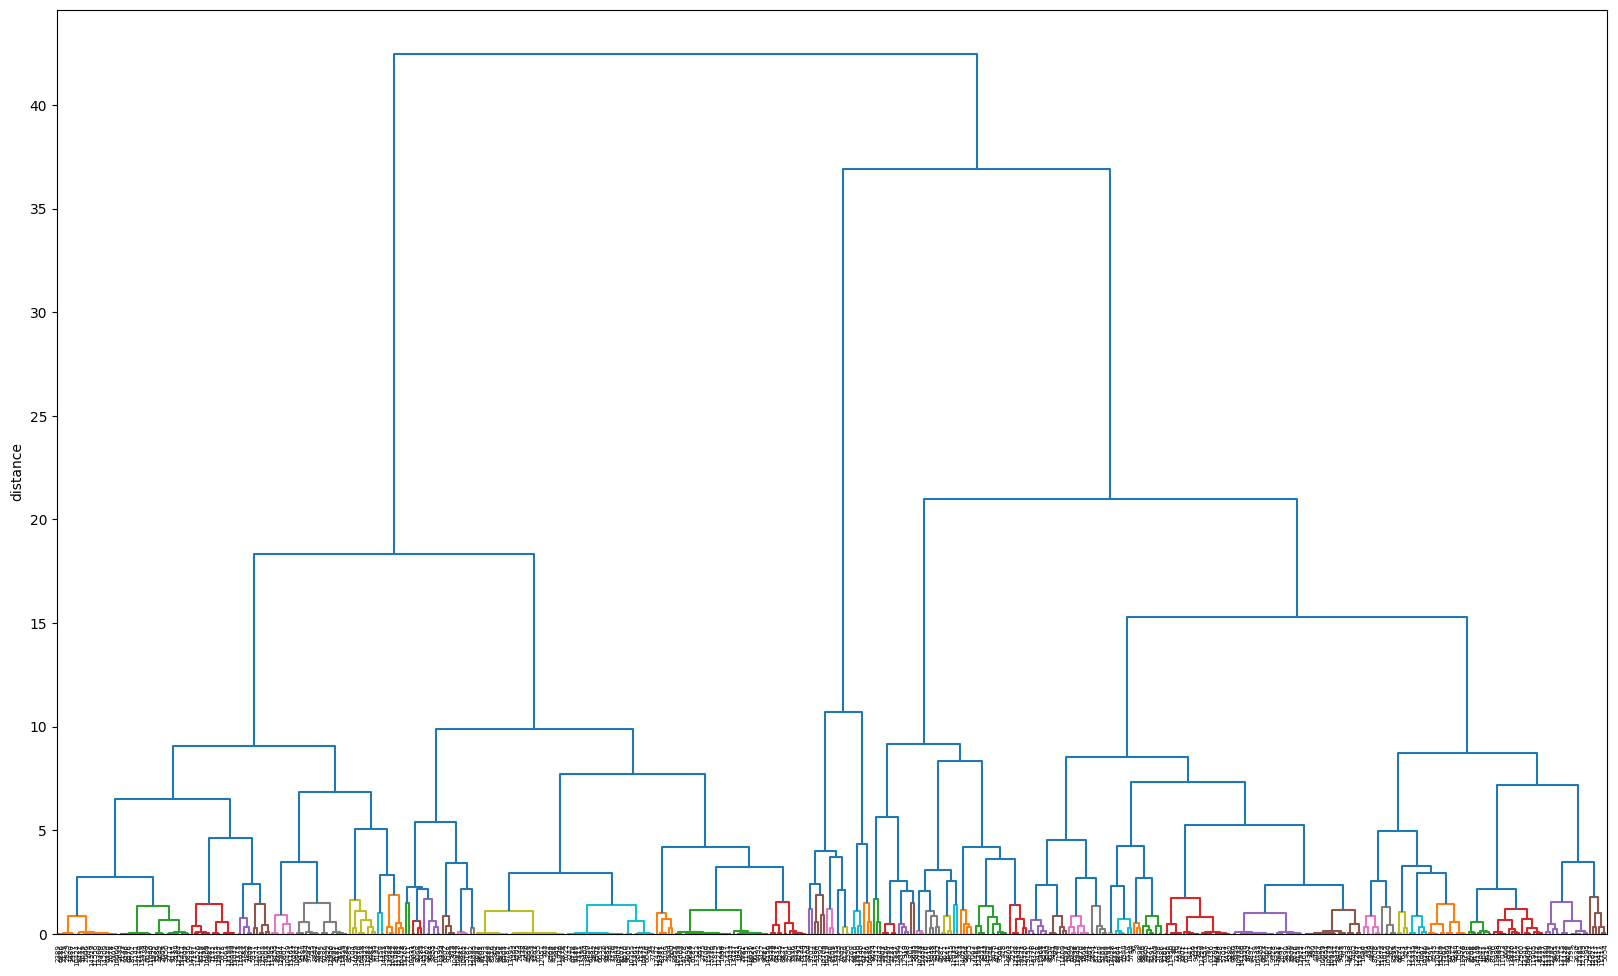

In [60]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [61]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_sc)

##coordinates of the cluster centers
# kmeans.cluster_centers_
clusters = pd.DataFrame(X_sc, columns=X.columns)
clusters['label'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
X_sc.columns

Index(['ctc', 'years_of_experience', 'classs', 'designation', 'tier', 'label'], dtype='object')

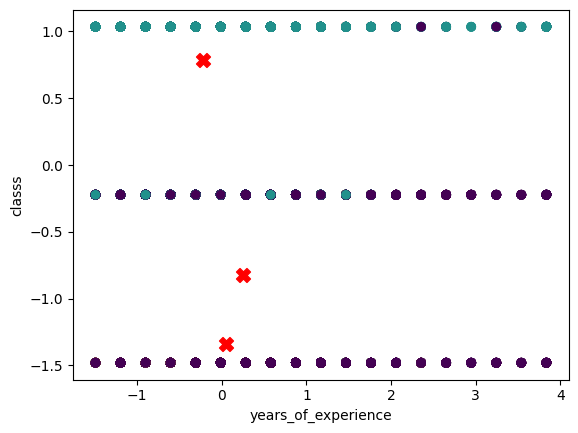

In [63]:
x_axis = 'years_of_experience'
y_axis = 'classs'

plt.scatter(clusters[x_axis], clusters[y_axis], c=clusters['label'], )
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color="red", marker="X", s=100)
plt.xlabel(x_axis)
plt.ylabel(y_axis);

In [64]:
import plotly.express as px
fig = px.scatter_3d(clusters, x='years_of_experience', y='ctc', z='tier', color='label', width=800, height=800)
fig.show()

In [65]:
df.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience'],
      dtype='object')

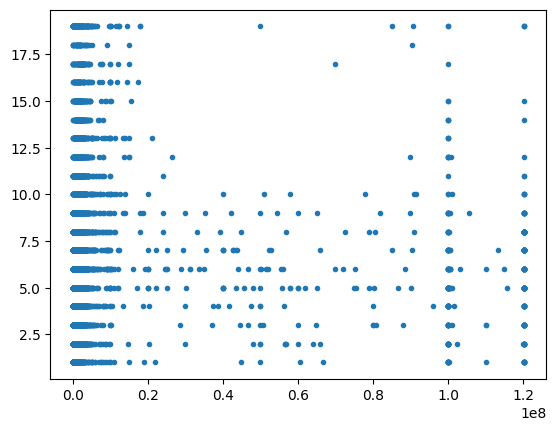

In [66]:
plt.plot(df['ctc'], df['years_of_experience'], '.')

<Axes: >

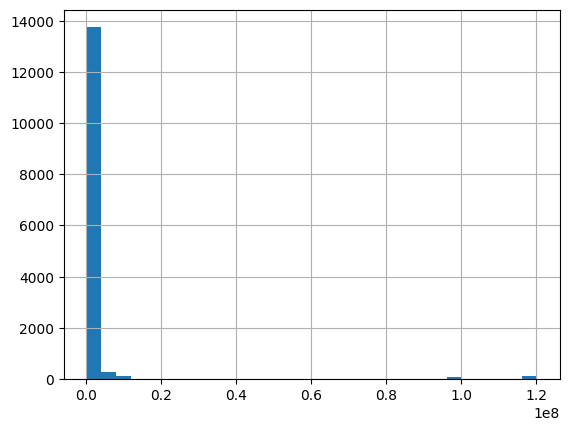

In [67]:
df['ctc'].hist(bins=30)

In [68]:
print('Ran')

Ran
